# Identificar fronteras no lineales

In [102]:
from sklearn.datasets.samples_generator import make_circles
from sklearn.datasets.samples_generator import make_blobs
from sklearn.svm import SVC


In [69]:
X, Y = make_circles(100, factor=0.1, noise=0.1)

In [70]:
import matplotlib.pyplot as plt
import numpy as np

In [81]:
def plt_svc(model, ax=None, plt_support = True):
    """Plot de la función de decisión para una clasificación en 2D con SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    ## Generar la serie de puntos para evaluar el modelo
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(yy, xx)
    
     ## La función ravel() regresa los elementos contenidos en del input en un vector 1D
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)    
    
    ## Representar las fronteras y márgenes del SVC
    ax.contour(X, Y, P, colors='k', levels = [-1,0,1], alpha =0.5, linestyles=["--", "-", "--"])
        
    if plt_support is True:
        ax.scatter(model.support_vectors_[:,0], 
                   model.support_vectors_[:,1],
                  s=300, linewidth=1, facecolors = "blue")
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

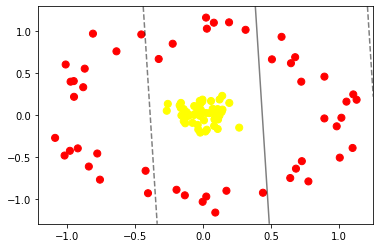

In [82]:
plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap = "autumn")

model = SVC(kernel="linear")
model.fit(X,Y)
plt_svc(model, plt_support=False)

In [83]:
r = np.exp(-(X**2).sum(1))

In [84]:
from mpl_toolkits import mplot3d

In [85]:
def plot_3d(elev = 30, azim=30, X=X, Y=Y, r=r):
    ax = plt.subplot(projection ="3d")
    ax.scatter3D(X[:,0], X[:,1], r, c=Y, s=50, cmap="autumn")
    ax.view_init(elev= elev, azim=azim)
    
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("r")

In [86]:
from ipywidgets import interact, fixed

In [87]:
interact(plot_3d, elev=[-90,-60, -30, 0, 30, 60, 90], 
         azim=[-180, -90, 0, 90,180], X = fixed(X), Y = fixed(Y), r= fixed(r))

interactive(children=(Dropdown(description='elev', index=4, options=(-90, -60, -30, 0, 30, 60, 90), value=30),…

<function __main__.plot_3d(elev=30, azim=30, X=array([[ 2.65106608e-01, -1.50978857e-01],
       [-1.01270500e+00,  6.02270691e-01],
       [ 1.90421156e-01,  1.10552566e+00],
       [ 4.39897256e-01, -9.27954748e-01],
       [-6.66617253e-02,  2.01781023e-04],
       [-9.23544962e-01, -3.98447850e-01],
       [ 1.40069894e-01,  2.28081025e-01],
       [ 1.62425919e-02, -1.97092423e-01],
       [-7.60237374e-01, -7.71853476e-01],
       [ 5.76666588e-02,  1.66638534e-01],
       [ 1.35795597e-01,  3.59666988e-02],
       [-1.09054925e+00, -2.73351658e-01],
       [ 1.00572635e+00, -5.08967199e-01],
       [ 1.06941062e-01, -4.53222269e-02],
       [ 7.83894823e-02,  1.10109067e+00],
       [-3.93643447e-03, -1.03610226e+00],
       [ 8.61751867e-02, -4.14059789e-02],
       [-9.51224657e-01,  2.16712938e-01],
       [ 1.92267931e-01,  1.43825835e-01],
       [ 1.09503864e-01, -5.33676757e-02],
       [ 1.71079055e-01, -9.04282419e-01],
       [ 1.41917851e-01,  6.41350869e-02],
       

## Intentar con un kernel "rbf" Radial Basis Function

In [100]:
rbf = SVC(kernel="rbf", C= 1E6, gamma="scale")
rbf.fit(X,Y)

SVC(C=1000000.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

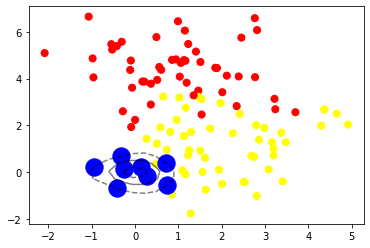

In [105]:
plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap="autumn")
plt_svc(rbf)

#plt.scatter(rbf.support_vectors_[:,0], rbf.support_vectors_[:,1], s=300, lw=1, facecolors=None)

## Ajustar los parámetros de SVM

In [120]:
X, Y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=1.2)

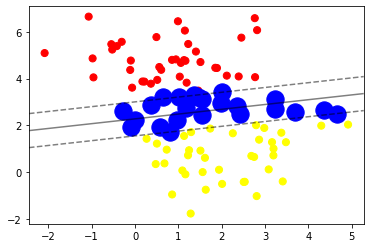

In [129]:
plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap="autumn")
model = SVC(kernel="linear", C=20)
model.fit(X, Y)
plt_svc(model)

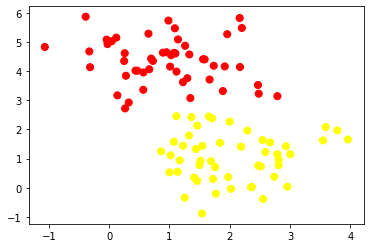

In [106]:
X, Y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=0.8)
plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap="autumn")

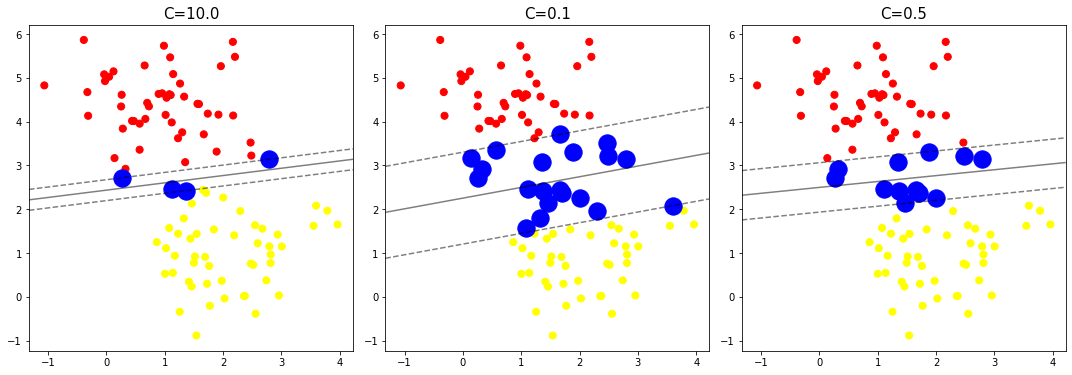

In [117]:
fig, ax = plt.subplots(1,3, figsize=(16,6))
fig.subplots_adjust(left=0.05, right=0.95, wspace=0.1)
for ax_i, C in zip(ax, [10.0, 0.1, 0.5]):
    model = SVC(kernel="linear", C=C)
    model.fit(X,Y)
    ax_i.scatter(X[:,0], X[:,1], c=Y, s=50, cmap="autumn")
    plt_svc(model, ax_i)
    ax_i.set_title("C="+ str(C), size=15)